In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp



In [152]:
def create_data1():
    n=100
    x=3* (np.random.rand(n,2)-0.5)
    rad = np.square(x[:,0]) + np.square( x[:,1])
    a=(rad >0.7 + 0.1*np.random.rand(n,))
    b=(rad <2.2 + 0.1*np.random.rand(n,))
    y=np.logical_and(a,b)
    y=2*y - 1
    return x,y
    
def create_data2():
    n=40
    omega = np.random.randn(1)
    noise = 0.8 * np.random.randn(n,)
    x = np.random.randn(n,2)
    a=omega *x[:,0]
    b=x[:,1]
    y = 2 *(a+b+noise >0) -1 ;
    return x,y

def create_data3():
    m = 20;
    n = 40;
    r = 2;
    A = np.random.rand(m, r) * np.random.rand(r, n);
    ninc = 100;
    Q = np.random.randperm(m * n, ninc);
    
def print_data(x,y,w,t):
    for i,j in zip(x,y):
        color= 'b'
        if j==1: color='r'
        plt.plot(i[0],i[1],color+'o')
    if t ==1:
        n = np.arange(-3, 3, 0.1)
        m = -(w[0]/w[1]) *n
        plt.plot(n, m,'g')
    plt.show()

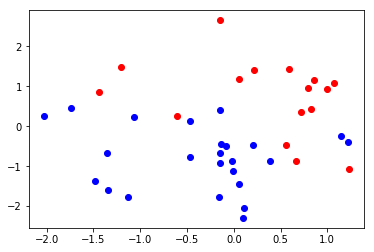

In [148]:
x,y = create_data2()
print_data(x,y,np.empty(2),0)

In [154]:
iteration_max = 50

def gradient_descent_method(df, init_w, learning_rate):
    x = init_w
    x_history = [x]
    for i in range(iteration_max):
        x_new = x- learning_rate * df.subs([(w1, x[0]), (w2, x[1])])
        x= x_new
        x_history.append(x)
        print(x)
    return (x, np.array(x_history))

def newton_method2(df,init_w):
    x = init_w
    x_history = [x]
    d1= Symbol('d1')
    d2= Symbol('d2')
    dw = np.array([d1, d2])
    for i in range(iteration_max):
        hess = np.array(diff(j, w, 2).subs([(w1, x[0]), (w2, x[1])])).reshape(2, 2)
        x_new= x+ np.array(list(solve(np.dot(hess, dw) + df.subs([(w1, x[0]), (w2, x[1])])).values()))
        x = x_new
        x_history.append(x)
        print(x)
    return (x, np.array(x_history))

l = 0.2
n = 40
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1,w2])
j = 0
for i in range(n):
    j = j+ ln(1+exp(-y[i]*np.dot(w.T,x[i])))
j = j + l*np.dot(w.T,w)
dj = j.diff(w)
wn, wn_his=newton_method2(dj,np.array((1,1)))
wg, wg_his=gradient_descent_method(dj,np.array((1,1)),0.1)
#wn, wn_his=newton_method(dj,hess,np.array((1,1)))
print(wg,wn)

[1.07924227794989 1.69885880587625]
[1.20369296163691 2.02882422852654]
[1.22865993827507 2.08534076023849]
[1.22928233437565 2.08667373163706]
[1.22928267843122 2.08667444783046]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444783066]
[1.22928267843132 2.08667444

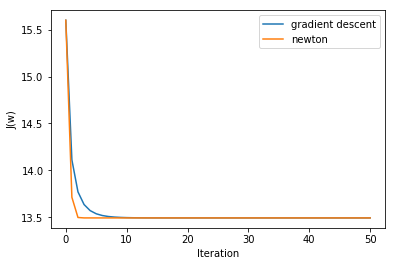

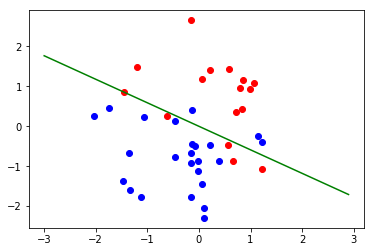

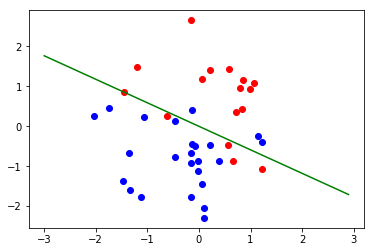

In [155]:
j_his = []
for i in wg_his:
    j_his.append(j.subs([(w1, i[0]), (w2, i[1])]))
plt.plot(j_his,label='gradient descent')

j_his = []
for i in wn_his:
    j_his.append(j.subs([(w1, i[0]), (w2, i[1])]))
plt.plot(j_his,label="newton")

plt.xlabel('Iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()
print_data(x,y,wg,1)
print_data(x,y,wn,1)